# Pythonモジュールを一覧化する方法いろいろ

In [1]:
%load_ext autoreload
%autoreload 2

## pipでインストールしたモジュールの一覧化
```pipdeptree```コマンドでモジュールの依存関係を一覧表示できる

In [2]:
!pipdeptree

altair==4.2.0
  - entrypoints [required: Any, installed: 0.4]
  - jinja2 [required: Any, installed: 3.1.2]
    - MarkupSafe [required: >=2.0, installed: 2.1.1]
  - jsonschema [required: >=3.0, installed: 4.6.0]
    - attrs [required: >=17.4.0, installed: 21.4.0]
    - pyrsistent [required: >=0.14.0,!=0.17.2,!=0.17.1,!=0.17.0, installed: 0.18.1]
  - numpy [required: Any, installed: 1.22.4]
  - pandas [required: >=0.18, installed: 1.4.3]
    - numpy [required: >=1.21.0, installed: 1.22.4]
    - python-dateutil [required: >=2.8.1, installed: 2.8.2]
      - six [required: >=1.5, installed: 1.16.0]
    - pytz [required: >=2020.1, installed: 2022.1]
  - toolz [required: Any, installed: 0.11.2]
backports.functools-lru-cache==1.6.4
blinker==1.4
bokeh==2.4.3
  - Jinja2 [required: >=2.9, installed: 3.1.2]
    - MarkupSafe [required: >=2.0, installed: 2.1.1]
  - numpy [required: >=1.11.3, installed: 1.22.4]
  - packaging [required: >=16.8, installed: 21.3]
    - pyparsing [required: >=2.0.2,!=3.0

## pipでインストールしたモジュールのライセンスの一覧化

```pip-licenses```コマンドでモジュールのバージョン及びライセンスを一覧表示できる

In [3]:
!pip-licenses

 Name                           Version    License                                                          
 Babel                          2.10.3     BSD License                                                      
 Bottleneck                     1.3.4      BSD License                                                      
 Cython                         0.29.30    Apache Software License                                          
 HeapDict                       1.0.1      BSD License                                                      
 Jinja2                         3.1.2      BSD License                                                      
 Mako                           1.2.0      MIT License                                                      
 MarkupSafe                     2.1.1      BSD License                                                      
 Pillow                         9.1.1      Historical Permission Notice and Disclaimer (HPND)               
 PyJWT             

## Pythonコード実行中にimport済みのモジュールを一覧化

```sys.modules```にimport済みのモジュールがdict型で格納される．

In [4]:
import sys
sys.modules

{'sys': <module 'sys' (built-in)>,
 'builtins': <module 'builtins' (built-in)>,
 '_frozen_importlib': <module '_frozen_importlib' (frozen)>,
 '_imp': <module '_imp' (built-in)>,
 '_thread': <module '_thread' (built-in)>,
 '_warnings': <module '_warnings' (built-in)>,
 '_weakref': <module '_weakref' (built-in)>,
 '_io': <module '_io' (built-in)>,
 'marshal': <module 'marshal' (built-in)>,
 'posix': <module 'posix' (built-in)>,
 '_frozen_importlib_external': <module '_frozen_importlib_external' (frozen)>,
 'time': <module 'time' (built-in)>,
 'zipimport': <module 'zipimport' (frozen)>,
 '_codecs': <module '_codecs' (built-in)>,
 'codecs': <module 'codecs' from '/opt/conda/lib/python3.10/codecs.py'>,
 'encodings.aliases': <module 'encodings.aliases' from '/opt/conda/lib/python3.10/encodings/aliases.py'>,
 'encodings': <module 'encodings' from '/opt/conda/lib/python3.10/encodings/__init__.py'>,
 'encodings.utf_8': <module 'encodings.utf_8' from '/opt/conda/lib/python3.10/encodings/utf_8.py

In [5]:
'numpy' in sys.modules

False

In [6]:
import numpy
'numpy' in sys.modules

True

## Pythonソースファイル内で使用されるモジュールの一覧化

In [7]:
from modulefinder import ModuleFinder

In [8]:
def test_modulefinder(finder, sample_code):
    try:
        finder.run_script(sample_code)

        print('Loaded modules:')
        for name, mod in finder.modules.items():
            print('%s: ' % name, end='')
            print(','.join(list(mod.globalnames.keys())[:3]))

        print('-'*50)
        print('Modules not imported:')
        print('\n'.join(finder.badmodules.keys()))
    except AttributeError as err:
        print('AttributeError occurred')
        print(err)

In [9]:
sample_code = "../lib/sample_module/bacon.py"
finder = ModuleFinder()
test_modulefinder(finder, sample_code)

Loaded modules:
__main__: __doc__,re,itertools
re: __doc__,enum,sre_compile
enum: sys,MappingProxyType,DynamicClassAttribute
sys: 
types: __doc__,sys,_f
functools: __doc__,__all__,get_cache_token
abc: __doc__,abstractmethod,abstractclassmethod
_abc: 
_py_abc: WeakSet,get_cache_token,ABCMeta
_weakrefset: ref,GenericAlias,__all__
_weakref: 
collections: __doc__,__all__,_collections_abc
_collections_abc: __doc__,ABCMeta,abstractmethod
itertools: 
keyword: __doc__,__all__,kwlist
operator: __doc__,__all__,_abs
builtins: 
_operator: 
reprlib: __doc__,__all__,builtins
_thread: 
_collections: 
heapq: __doc__,__about__,__all__
_heapq: 
doctest: __doc__,__docformat__,__all__
__future__: __doc__,all_feature_names,__all__
difflib: __doc__,__all__,_nlargest
inspect: __doc__,__author__,abc
ast: __doc__,sys,contextmanager
_ast: 
contextlib: __doc__,abc,sys
warnings: __doc__,sys,__all__
_warnings: 
linecache: __doc__,functools,sys
os: __doc__,abc,sys
stat: __doc__,ST_MODE,ST_INO
_stat: 
posix: 
posixp

In [10]:
sample_code = "../lib/sample_module/test_numpy.py"
finder = ModuleFinder()
test_modulefinder(finder, sample_code)

Loaded modules:
__main__: __doc__,np
numpy: __doc__,sys,warnings
sys: 
warnings: __doc__,sys,__all__
_warnings: 
linecache: __doc__,functools,sys
functools: __doc__,__all__,get_cache_token
abc: __doc__,abstractmethod,abstractclassmethod
_abc: 
_py_abc: WeakSet,get_cache_token,ABCMeta
_weakrefset: ref,GenericAlias,__all__
_weakref: 
types: __doc__,sys,_f
_collections_abc: __doc__,ABCMeta,abstractmethod
collections: __doc__,__all__,_collections_abc
itertools: 
keyword: __doc__,__all__,kwlist
operator: __doc__,__all__,_abs
builtins: 
_operator: 
reprlib: __doc__,__all__,builtins
_thread: 
_collections: 
heapq: __doc__,__about__,__all__
_heapq: 
doctest: __doc__,__docformat__,__all__
__future__: __doc__,all_feature_names,__all__
difflib: __doc__,__all__,_nlargest
re: __doc__,enum,sre_compile
enum: sys,MappingProxyType,DynamicClassAttribute
sre_compile: __doc__,_sre,sre_parse
_sre: 
sre_parse: __doc__,MAGIC,MAXREPEAT
sre_constants: __doc__,MAGIC,MAXREPEAT
unicodedata: 
_locale: 
copyreg: __

In [11]:
sample_code = "../lib/sample_module/test_pandas.py"
finder = ModuleFinder()
test_modulefinder(finder, sample_code)

AttributeError occurred
'NoneType' object has no attribute 'is_package'


In [12]:
sample_code = "../lib/sample_module/test_scikit-learn.py"
finder = ModuleFinder()
test_modulefinder(finder, sample_code)

AttributeError occurred
'NoneType' object has no attribute 'is_package'


## Pythonソースファイルまたは対象ディレクトリ内で使用されるモジュールの依存関係の可視化

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [14]:
!pydeps --noshow -T png -o bacon.png ../lib/sample_module/bacon.py

/opt/conda/lib/python3.10/site-packages/pydeps/pystdlib.py:17: UserWarning: stdlib_list does't support Python 3.10 yet, pydeps will use symbols from 3.9 for now.
  warnings.warn(


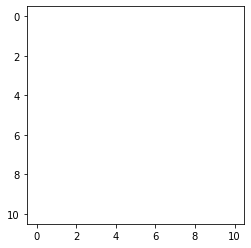

In [15]:
img = plt.imread('bacon.png')
fig, ax = plt.subplots()
ax.imshow(img)

In [16]:
!pydeps --noshow -T png -o test_numpy.png ../lib/sample_module/test_numpy.py

/opt/conda/lib/python3.10/site-packages/pydeps/pystdlib.py:17: UserWarning: stdlib_list does't support Python 3.10 yet, pydeps will use symbols from 3.9 for now.
  warnings.warn(


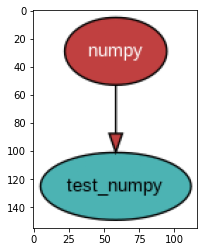

In [17]:
img = plt.imread('test_numpy.png')
fig, ax = plt.subplots()
ax.imshow(img)

In [18]:
!pydeps --noshow -T png -o test_pandas.png ../lib/sample_module/test_pandas.py

/opt/conda/lib/python3.10/site-packages/pydeps/pystdlib.py:17: UserWarning: stdlib_list does't support Python 3.10 yet, pydeps will use symbols from 3.9 for now.
  warnings.warn(


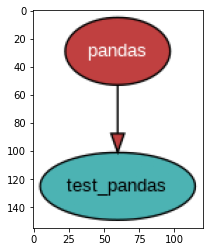

In [19]:
img = plt.imread('test_pandas.png')
fig, ax = plt.subplots()
ax.imshow(img)

In [20]:
!pydeps --noshow -T png -o test_scikit-learn.png ../lib/sample_module/test_scikit-learn.py

dummymodule.py:114: WARNING: SKIPPING ILLEGAL MODULE_NAME: test_scikit-learn
/opt/conda/lib/python3.10/site-packages/pydeps/pystdlib.py:17: UserWarning: stdlib_list does't support Python 3.10 yet, pydeps will use symbols from 3.9 for now.
  warnings.warn(


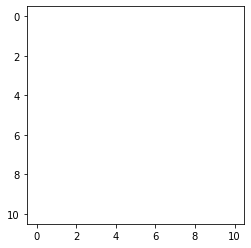

In [21]:
img = plt.imread('test_scikit-learn.png')
fig, ax = plt.subplots()
ax.imshow(img)